# Linear Regression with Sacramento Real Estate Data

In [3]:
import pandas as pd

In [4]:
sac_csv = '../datasets/sacramento_real_estate_transactions.csv'

In [5]:
shd = pd.read_csv(sac_csv)

shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### EDA

In [6]:
shd.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [7]:
shd['zip'] = shd['zip'].astype(str)

In [8]:
shd.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1312.918782,856.123224,-984.000000,950.000000,1304.000000,1718.000000,5822.000000
price,985.0,233715.951269,139088.818896,-210944.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.445121,5.103637,-121.503471,38.482704,38.625932,38.695589,39.020808
longitude,985.0,-121.193371,5.100670,-121.551704,-121.446119,-121.375799,-121.294893,38.668433


In [9]:
shd.city.value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
FAIR OAKS            9
CAMERON PARK         9
WILTON               5
AUBURN               5
ELVERTA              4
GOLD RIVER           4
POLLOCK PINES        3
GRANITE BAY          3
WEST SACRAMENTO      3
RANCHO MURIETA       3
EL DORADO            2
LOOMIS               2
MEADOW VISTA         1
MATHER               1
GREENWOOD            1
GARDEN VALLEY        1
SHINGLE SPRINGS      1
SLOUGHHOUSE          1
WALNUT GROVE         1
DIAMOND SPRINGS      1
COOL                 1
FORESTHILL           1
PENRYN               1
Name: city, dtype: int64

In [10]:
shd[shd['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [11]:
print(shd[shd['beds'] == 0].shape)

(108, 12)


In [12]:
shd[shd['price'] < 1]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [13]:
shd[shd['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [14]:
shd[shd['state'] != 'CA']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [15]:
shd.drop(703, inplace = True)

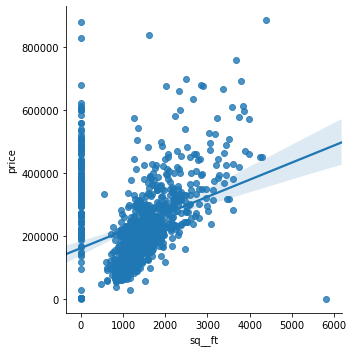

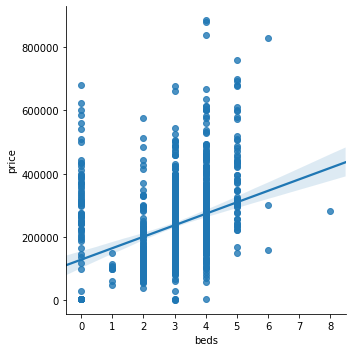

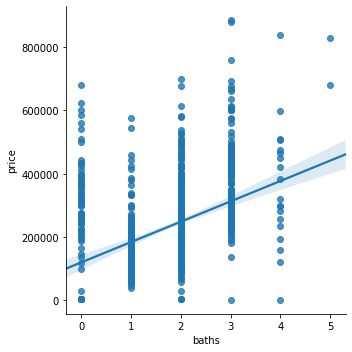

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.lmplot(x='sq__ft', y='price', data=shd)
plt.show()
sns.lmplot(x='beds', y='price', data=shd)
plt.show()
sns.lmplot(x='baths', y='price', data=shd)
plt.show()

In [17]:
import numpy as np
import scipy.stats

def lin_reg(x,y):

    beta_1 = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
    
    beta_0 = np.mean(y)-(beta_1*np.mean(x)) 
    
    print('The Optimal Y Intercept is ', beta_0)
    print('The Optimal slope is ', beta_1)

In [18]:
x = shd['sq__ft'].values
y = shd['price'].values
lin_reg(x,y)

The Optimal Y Intercept is  162938.7375609862
The Optimal slope is  54.15619752295772


In [19]:
y_pred = []

for x in shd['sq__ft']:
    y = 162938.74 + (54.16*x)
    y_pred.append(y)

In [20]:
shd['Pred'] = y_pred

shd['Residuals'] = abs(shd['price']-shd['Pred'])

In [21]:
shd['Residuals'].mean()

95954.38126016295

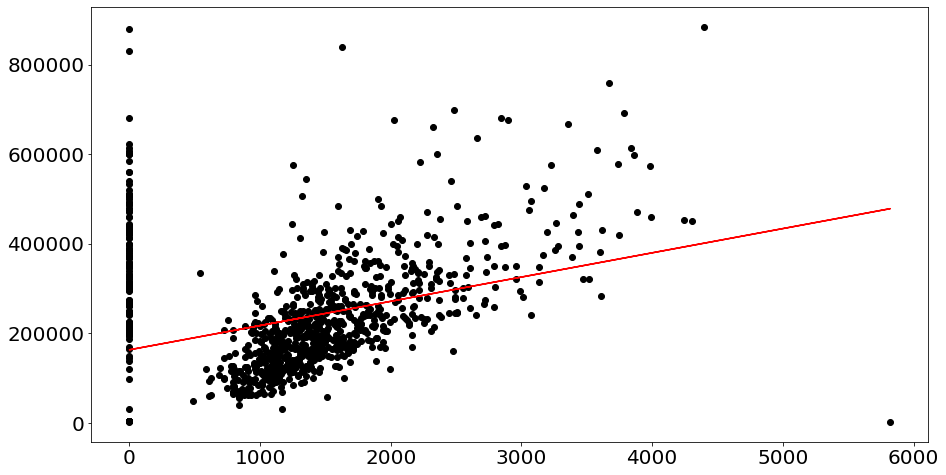

In [24]:
fig = plt.figure(figsize=(15,8))

plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

ax = plt.gca()

ax.scatter(x= shd['sq__ft'], y=shd['price'], c='k')
ax.plot(shd['sq__ft'], shd['Pred'], color='r');

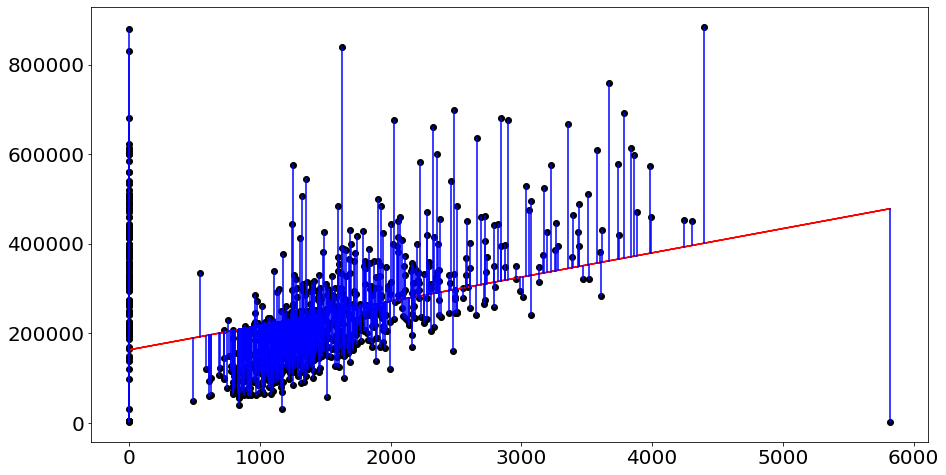

In [26]:
fig = plt.figure(figsize=(15,8))

plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

ax = plt.gca()

ax.scatter(x= shd['sq__ft'], y=shd['price'], c='k')
ax.plot(shd['sq__ft'], shd['Pred'], color='r');

for _, row in shd.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Pred']), 'b-')

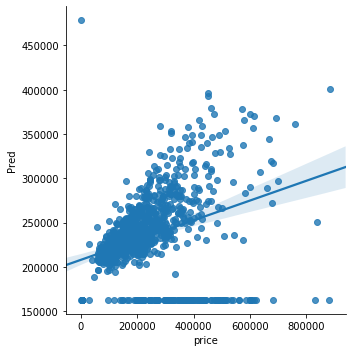

In [27]:
sns.lmplot(x='price', y='Pred', data=shd)